In [108]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd
import os
from natsort import natsorted

In [110]:
data_path = '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data'
data_name_files = [f.name for f in os.scandir(data_path) if f.is_file()]
for i in data_name_files:
  print(i)

File_2.csv
File_3.csv
File_1.csv
File_4.csv
File_5.csv
File_6.csv
File_7.csv
File_8.csv
File_9.csv
File_10.csv
File_11.csv
File_12.csv
File_13.csv


In [111]:
data_name_files = natsorted(data_name_files)
data_name_file_paths = []

for i in data_name_files:
    data_name_file_paths.append(os.path.join(data_path, i))

print(data_name_file_paths)


['/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_1.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_2.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_3.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_4.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_5.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_6.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_7.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_8.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_9.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_10.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_11.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_12.csv', '/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_13.csv']


In [112]:
# cols_to_convert = [
#     'atr01/acc_x', 'atr01/acc_y', 'atr01/acc_z', 'atr01/gyro_x', 'atr01/gyro_y', 'atr01/gyro_z',
#     'atr01/quat_w', 'atr01/quat_x', 'atr01/quat_y', 'atr01/quat_z',
#     'atr02/acc_y', 'atr02/acc_z', 'atr02/gyro_x', 'atr02/gyro_y', 'atr02/gyro_z',
#     'atr02/quat_w', 'atr02/quat_x', 'atr02/quat_y', 'atr02/quat_z',
#     'atr03/acc_x', 'atr03/acc_y', 'atr03/acc_z', 'atr03/gyro_x', 'atr03/gyro_y', 'atr03/gyro_z',
#     'atr03/quat_w', 'atr03/quat_x', 'atr03/quat_y', 'atr03/quat_z',
#     'atr04/acc_x', 'atr04/acc_z', 'atr04/gyro_x', 'atr04/gyro_y', 'atr04/gyro_z',
#     'atr04/quat_w', 'atr04/quat_x', 'atr04/quat_y', 'atr04/quat_z'
# ]

# data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [113]:
# for i in range(13):
#     path = data_name_file_paths[i]
#     data = pd.read_csv(path)

#     cols_to_convert = [
#         'atr01/acc_x', 'atr01/acc_y', 'atr01/acc_z', 'atr01/gyro_x', 'atr01/gyro_y', 'atr01/gyro_z',
#         'atr01/quat_w', 'atr01/quat_x', 'atr01/quat_y', 'atr01/quat_z',
#         'atr02/acc_y', 'atr02/acc_z', 'atr02/gyro_x', 'atr02/gyro_y', 'atr02/gyro_z',
#         'atr02/quat_w', 'atr02/quat_x', 'atr02/quat_y', 'atr02/quat_z',
#         'atr03/acc_x', 'atr03/acc_y', 'atr03/acc_z', 'atr03/gyro_x', 'atr03/gyro_y', 'atr03/gyro_z',
#         'atr03/quat_w', 'atr03/quat_x', 'atr03/quat_y', 'atr03/quat_z',
#         'atr04/acc_x', 'atr04/acc_z', 'atr04/gyro_x', 'atr04/gyro_y', 'atr04/gyro_z',
#         'atr04/quat_w', 'atr04/quat_x', 'atr04/quat_y', 'atr04/quat_z'
#     ]

#     # Chuyển các cột số sang float
#     data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

#     # Nếu có các cột này, thì chuyển sang category
#     if 'Unnamed: 0' in data.columns:
#         data['Unnamed: 0'] = data['Unnamed: 0'].astype('category')
#     if 'operation' in data.columns:
#         data['operation'] = data['operation'].astype('category')

#     # Thay thế 0 bằng NaN
#     data.replace(0, pd.NA, inplace=True)

#     # Ghi đè file và in thông tin
#     print(f"Đã xử lý: {path}")
#     data.to_csv(path, index=False)
#     print(data.describe(), end="\n\n")
#     print(data.info(), end="\n")
#     print("#" * 80)


In [114]:
df = pd.read_csv(data_name_file_paths[0])
df.describe()
df = df.dropna()  # Loại bỏ các hàng chứa NaN




In [115]:
# pip install tsfel


In [116]:
df['operation'].value_counts()

,count
operation,
300,11348
200,10622
100,10553
700,9985
400,9711
500,6327
1000,4456
800,4296
600,3271


In [117]:
import tsfel
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo cấu hình đặc trưng mặc định cho tất cả các miền
cfg = tsfel.get_features_by_domain()


In [118]:

# Tần số lấy mẫu
fs = 30  # Hz
signal = df['atr01/acc_x'].values



# Kích thước cửa sổ (số mẫu trong mỗi cửa sổ)
window_size = 15

# Trích xuất đặc trưng với cửa sổ
X = tsfel.time_series_features_extractor(cfg, signal, fs=fs, window_size=window_size)


In [119]:

print(X)


      0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0             10.429151                0.328367                1.0   
1             10.449104                0.332792                1.0   
2             12.163623                0.401785                1.0   
3              8.147902                0.319568                1.0   
4              7.622143                0.315968                1.0   
...                 ...                     ...                ...   
4968           5.684096                0.241003                1.0   
4969           6.312528                0.292207                1.0   
4970           8.158191                0.340528                1.0   
4971           5.709915                0.274625                1.0   
4972           6.506791                0.250517                1.0   

      0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0           22.348182    0.307163                        3.0   
1           22.390937    0.2458

In [120]:
df.isna().sum()

,0
Unnamed: 0,0
action,0
atr01/acc_x,0
atr01/acc_y,0
atr01/acc_z,0
atr01/gyro_x,0
atr01/gyro_y,0
atr01/gyro_z,0
atr01/quat_w,0
atr01/quat_x,0


In [122]:
import numpy as np

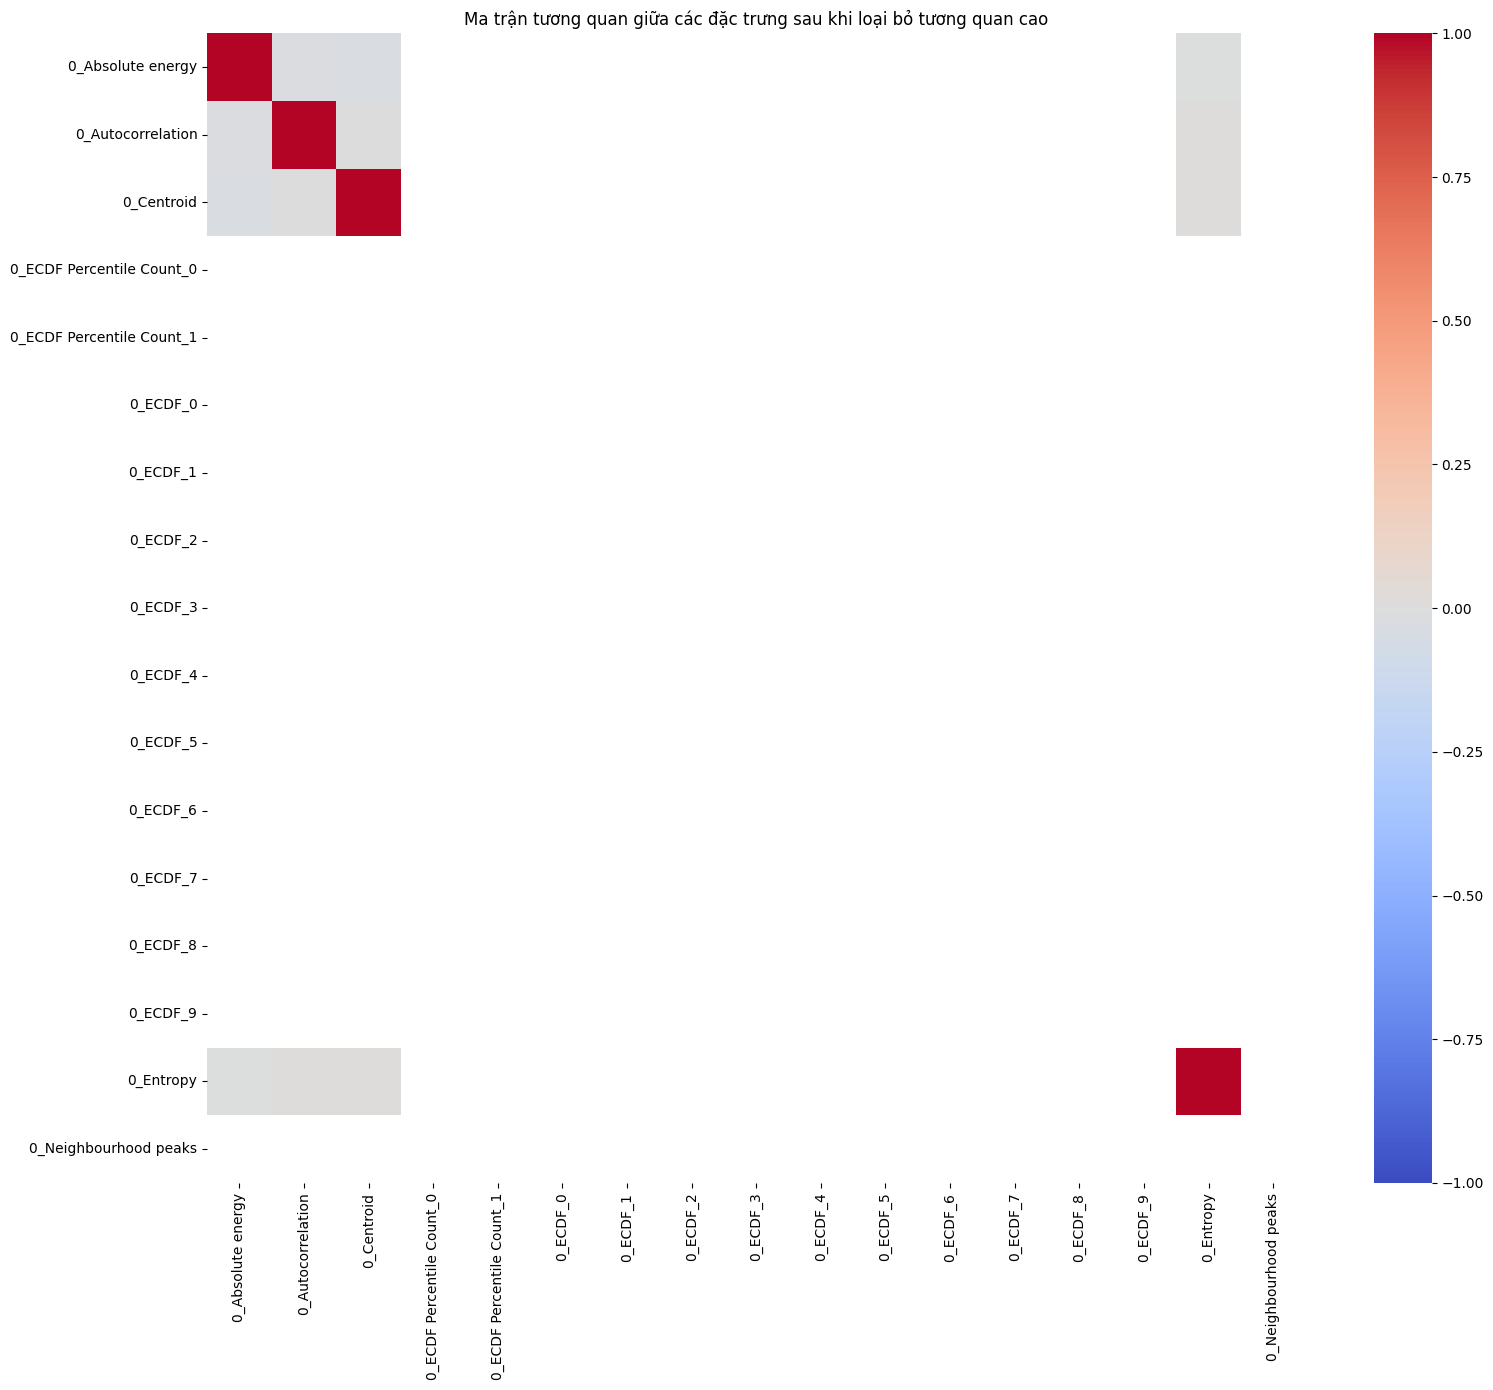

In [130]:
# Tính ma trận tương quan và loại bỏ các đặc trưng có tương quan cao
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.05)]
X_filtered = X.drop(columns=to_drop)

# Tính lại ma trận tương quan sau khi lọc
filtered_corr_matrix = X_filtered.corr()

# Vẽ heatmap cho ma trận tương quan sau lọc
plt.figure(figsize=(16, 14))
sns.heatmap(filtered_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các đặc trưng sau khi loại bỏ tương quan cao')
plt.tight_layout()
plt.show()

In [131]:
print(f"Số đặc trưng ban đầu: {X.shape[1]}")
print(f"Số đặc trưng sau lọc: {X_filtered.shape[1]}")


Số đặc trưng ban đầu: 132
Số đặc trưng sau lọc: 17
